<a href="https://colab.research.google.com/github/epignatelli/fenton_karma_jax/blob/master/fenton_karma_jax_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/epignatelli/fenton_karma_jax.git

Cloning into 'fenton_karma_jax'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 79 (delta 40), reused 23 (delta 8), pack-reused 0
Unpacking objects: 100% (79/79), done.


In [0]:
from fenton_karma_jax import params
from fenton_karma_jax import model
import matplotlib.pyplot as plt
import jax
import jax.numpy as np

In [0]:
# geometry
shape = (128, 128)
dt = 0.01

# diffusivity map
d = 0.05
D = np.ones(shape) * d

# stimuli
field = np.zeros(shape)
field = jax.ops.index_update(field, jax.ops.index[0:20], .8)
s1 = {
    "field": field,
    "start": 0,
    "duration": 2,
    "period": 0  # non-cyclic
}

field2 = np.zeros(shape)
field2 = jax.ops.index_update(field, jax.ops.index[:, -20:], .5)
s2 = {
    "field": field2,
    "start": 200,
    "duration": 2,
    "period": 0  # non-cyclic
}

field3 = np.zeros(shape)
field2 = jax.ops.index_update(field, jax.ops.index[40:60], .5)
s3 = {
    "field": field3,
    "start": 360,
    "duration": 15,
    "period": 0  # non-cyclic
}

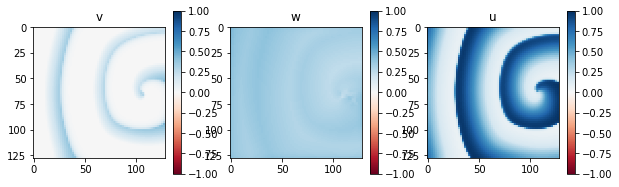

CPU times: user 13.1 s, sys: 582 ms, total: 13.7 s
Wall time: 13.7 s


In [11]:
%%time
state = model.forward(shape, 100000, params.params_test(), D, [s1, s2], dt)
model.show(state, vmin=-1, vmax=1, cmap="RdBu")